In [1]:
"""Programme forward pour modéliser les temps d'arrivée de la réflexion sur le bulbe lors d'une injection de type Porchet
suivie par radar de sol"""

%matplotlib inline

import numpy as np
import os
#import matplotlib.pyplot as plt
#import sys, h5py, binascii

import pygimli as pg
from pygimli.meshtools import appendTriangleBoundary, merge2Meshes, mesh
from pygimli.mplviewer import drawMesh
from pygimli.viewer import showMesh

from definition_maillage import *
from ecriture_fich_gprMax import *
from ecriture_in import *
from interp_charge_trou import *
from interp_maillage_gprMax import *



In [2]:
#Def des paramètres de géométrie du modéle
xmin,xmax = 0, 40 # en cm
emin,emax = 0, 80 #  elevation en cm
dtrou = 30 # prof du trou en cm
etrou = emax - dtrou # elevation du fond du trou
r=2 # rayon du trou en cm
dx = .1 #On définit le pas de la maille
zaff= 20 #profondeur en cm jusqu'où on souhaite un maillage affiné. 
eaff=etrou-zaff

h_0=-95 #charge initiale en cm, soit l'état initial du sol (teneur en eau exprimée en charge)
h_1=10 #hauteur d'eau au fond du trou en cm

param = [0.06, 0.3, 0.06, 0.3, 0.016, 8.52, 0.07, 0.07, 0.3] #Paramètres d'entrée tr, ts, alpha, n, Ks
temps=[0.17, 0.33, 0.50, 0.67, 0.83, 1.00, 1.17, 1.33, 1.50, 1.67, 1.83, 2.00, 2.17, 2.33, 2.50, 2.67, 2.83, 3.00, 3.17, 3.33, 3.50, 3.67, 3.83, 4.00, 4.17, 4.33, 4.50, 4.67, 4.83, 5.00, 5.17, 5.33, 5.50, 5.67, 5.83, 6.00]#Temps de calcul en minutes
#temps=[1.00, 2.00, 3.00, 4.00, 5.00, 6.00]#Temps de calcul en minutes

In [3]:

#Définition du maillage triangulaire
[mesh, pg_pos, mesh_pos, mesh_cells]=definition_maillage(xmin, xmax, emin, emax, dtrou, etrou, r, dx, zaff, eaff)


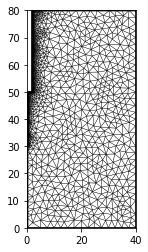

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff247292d68>, None)

In [4]:
from pygimli.viewer import showMesh
showMesh(mesh)


In [5]:
#Interpolation de la charge sur les bords du trou
[p, charge_imp, n_free_drainage, n_total]=interp_charge_trou(mesh_pos, etrou, r, h_0, h_1)

In [6]:
#Création des fichiers .in nécessaires pour SMWS_2D
ecriture_in(mesh, param, temps, p, n_total)

#Lancement SWMS_2D
!cp Grid.in SWMS_2D.IN/
!cp Selector.in SWMS_2D.IN/
!~/Codes/HD2/H2D

 Example                                                                 

 Program SWMS_2D
 Time independent boundary conditions
 Axisymmetric flow, V = L*L*L
 Units: L = cm   , T = min  , M = -    
 -----------------------------------------------------
 |                                                   |
 |                     SWMS_2D                       |
 |                                                   |
 |     Code for simulating water flow and solute     |
 |       transport in two-dimensional variably       |
 |             saturated porous media                |
 |                                                   |
 |                  version 1.22                     |
 |          Last modified: January, 1994             |
 |                                                   |
 -----------------------------------------------------

 Example                                                                 
 Axisymmetric flow, V = L*L*L
 reading nodal information
 reading

        1.9363  4   451  -0.280E+03 -0.688E+03  0.000E+00    10.     0.
        1.9575  4   455  -0.279E+03 -0.694E+03  0.000E+00    10.     0.
        1.9787  4   459  -0.279E+03 -0.700E+03  0.000E+00    10.     0.
        2.0000  4   463  -0.278E+03 -0.706E+03  0.000E+00    10.     0.
        2.0213  4   467  -0.278E+03 -0.712E+03  0.000E+00    10.     0.
        2.0425  4   471  -0.277E+03 -0.718E+03  0.000E+00    10.     0.
        2.0638  3   474  -0.277E+03 -0.724E+03  0.000E+00    10.     0.
        2.0903  4   478  -0.276E+03 -0.731E+03  0.000E+00    10.     0.
        2.1169  4   482  -0.276E+03 -0.739E+03  0.000E+00    10.     0.
        2.1434  4   486  -0.275E+03 -0.746E+03  0.000E+00    10.     0.
        2.1700  4   490  -0.274E+03 -0.753E+03  0.000E+00    10.     0.
        2.1929  4   494  -0.274E+03 -0.759E+03  0.000E+00    10.     0.
        2.2157  4   498  -0.274E+03 -0.766E+03  0.000E+00    10.     0.
        2.2386  4   502  -0.273E+03 -0.772E+03  0.000E+00    10.

        5.7767  4   895  -0.243E+03 -0.167E+04  0.000E+00    10.     0.
        5.8300  4   899  -0.243E+03 -0.169E+04  0.000E+00    10.     0.
        5.8867  4   903  -0.243E+03 -0.170E+04  0.000E+00    10.     0.
        5.9433  4   907  -0.243E+03 -0.172E+04  0.000E+00    10.     0.
        6.0000  4   911  -0.242E+03 -0.173E+04  0.000E+00    10.     0.


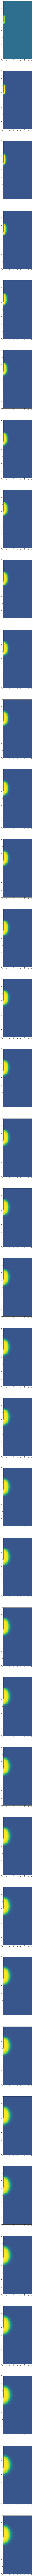

In [7]:
#Interpolation du maillage sur une grille rectangulaire 2D pour gprMax
#On crée un maillage rectangulaire avec les dimensions du modèle
xmin, xmax = 0.0, 40.
zmin, zmax = 0.0, 80.

dx = 1.0 #en cm

#fich_thetas = "TEST_AFF/th.out" #Fichier contenant les thetas
fich_thetas = "SWMS_2D.OUT/th.out" #Fichier contenant les thetas

[xv, yv, T, mx, my, mesh2, grid, grid_mat, eps_mat] = interp_maillage_gprMax(xmin, xmax, zmin, zmax, dx, param, mesh, mesh_pos[:,:2], fich_thetas, temps)

In [8]:
import math
#Lancement gprMax
nom='Forward'
   
sigma=0.0000
#eps_w=80.1 #Epsilon eau
eps_w=80.1
eps_pvc=3 #Epsilon pvc
eps_s=2.5 #Epsilon sable
p=param[1] #Porosité = theta s
#Maxieps=( math.sqrt(eps_w)*0.9*p + (1-p)*math.sqrt(eps_s) +0.1*p )**2
Maxieps=( math.sqrt(eps_w)*p + (1-p)*math.sqrt(eps_s) )**2
Minv=0.3/math.sqrt(Maxieps)
#Minv=0.3/eps_w
Minlambda=Minv*(10**9)/(2800*(10**6))
dl=Minlambda/10

time=0.000000030
dx=abs((xv.T*0.01)[0,1]-(xv.T*0.01)[0,0])
dy=abs((yv.T*0.01)[1,0]-(yv.T*0.01)[0,0])
#dl=dx/2
#dl=dx
fac_dt = 0.2

#Définition de ce qu'on a besoin pour gprMax
import math
from scipy.interpolate import griddata

#for i in range(0,len(T)) :
#    grid_z0 = griddata((mx, my), grid[:,i], (xv, yv), method='linear', fill_value=0.0).T
    
materiaux = {}

def materiau(x):
    if x in materiaux:
        return materiaux[x]
    valeur = "sand{}".format(len(materiaux))
    materiaux[x] = valeur
    return valeur
for i in range(0,len(T)+1):
    for j in range(0,81):
        for k in range(0,41):
            #grid_mat[i][j,k]=round(grid_mat[i][j,k],3)
            #grid_mat[i][j,k]=grid_mat[i][j,k]*2
            #f[i][j,k]=CRIM(grid_mat[i][j,k], eps_w,eps_s,p)
            materiau(grid_mat[i][j,k])
    #nmedia=len((yv.T*0.01)[:,0])*len(grid_mat[i][0,:])
    nmedia=len(materiaux)+2
    ecriture_fich_gprMax(param, xv.T*0.01, yv.T*0.01, T, grid_mat[i], i, param[7], nom, h_1*0.01, etrou*0.01, r*0.01, sigma, eps_w, eps_pvc, eps_s, p, nmedia, time, dx, dy, dl, fac_dt, materiaux)

In [ ]:
#Lancement du logiciel gprMax
!../gprMax Forward70_28.in

# Picking

In [140]:
import h5py
import math

filename='Forward70__merged.out'
f = h5py.File(filename, 'r')
path = '/rxs/rx1/'
#modelruns = f.attrs['Modelruns']
modelruns=len(T)+1
samples = f.attrs['Iterations']
dt = f.attrs['dt']*1e9
#positions = f.attrs['Positions'][:,0,0]
dx = 1
#dx = np.diff(positions)[0]
data = np.ones((samples, modelruns))
t_max = np.zeros(modelruns)
tps = np.zeros(modelruns)

#Calcul du temps d'arrivé de la première réflexion:
h = math.sqrt(0.3**2 + 0.2**2)
v_init=0.3/(math.sqrt(3.854))
t_init = (2*h)/v_init
itmin=(t_init/dt,0)

print(itmin)
for model in range(0,modelruns):
    data[:,model] = f['%s%s' % (path, 'Ez')][:,model]
    t_max[model] = np.max(data[int(itmin[0]):,model])
    tt = np.where(data[:,model]==t_max[model])
    tps[model] = tt[0]*dt
    
tps=tps-tps[0]
dx_dt=(dx,dt)
print(tps)

(708.0257455361524, 0)
[0.         1.66620039 2.07275328 2.35267495 2.53928939 2.69924463
 2.84587026 2.96583669 3.08580312 3.20576954 3.30574157 3.39904879
 3.47902641 3.57899843 3.66564085 3.75228327 3.81893129 3.8922441
 3.97222172 4.03886974 4.09885295 4.16550097 4.23214898 4.2921322
 4.34545061 4.39876902 4.45208743 4.51207065 4.56538906 4.61870747
 4.67202588 4.7186795  4.77199791 4.81865152 4.86530513 4.90529394
 4.95861235]


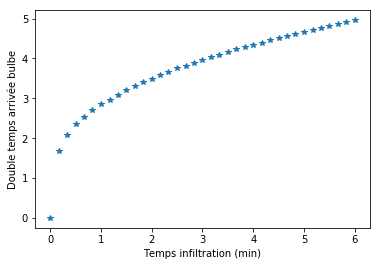

In [141]:
import matplotlib.pyplot as plt

tps_infilt = np.zeros(len(T)+1)
for i in range(0,len(T)+1):
    if i==0:
        tps_infilt[i]=0.0
    else :
        tps_infilt[i] = T[i-1]

        
plt.plot(tps_infilt, tps, '*')
plt.ylabel('Double temps arrivée bulbe')
plt.xlabel('Temps infiltration (min)')
plt.show(fig)

# TESTS

In [ ]:
materiaux = {}

def materiau(x):
    if x in materiaux:
        return materiaux[x]
    valeur = "sand{}".format(len(materiaux))
    materiaux[x] = valeur
    return valeur

In [ ]:
for i in range(0,1820,1):
    materiau(grid[i,24])

In [ ]:
for i in range(0,80,1):
    for j in (0,40,1):
        materiau(grid_z0[i,j])

In [ ]:
for i in range(0,1820,1):
    materiau(theta_mat[i,24])

In [ ]:
materiaux[0.282]

In [ ]:
len(materiaux)

In [9]:
materiaux

{3.854: 'sand2',
 3.9: 'sand0',
 4.0: 'sand3',
 4.1: 'sand21',
 4.2: 'sand8',
 4.3: 'sand16',
 4.4: 'sand18',
 4.5: 'sand42',
 4.6: 'sand19',
 4.7: 'sand55',
 4.8: 'sand36',
 4.9: 'sand86',
 5.0: 'sand7',
 5.1: 'sand59',
 5.2: 'sand38',
 5.3: 'sand56',
 5.4: 'sand76',
 5.5: 'sand54',
 5.6: 'sand97',
 5.7: 'sand70',
 5.8: 'sand11',
 5.9: 'sand66',
 6.0: 'sand79',
 6.1: 'sand46',
 6.2: 'sand27',
 6.3: 'sand103',
 6.4: 'sand48',
 6.5: 'sand77',
 6.6: 'sand31',
 6.7: 'sand78',
 6.8: 'sand52',
 6.9: 'sand87',
 7.0: 'sand39',
 7.1: 'sand53',
 7.2: 'sand83',
 7.3: 'sand92',
 7.4: 'sand13',
 7.5: 'sand84',
 7.6: 'sand105',
 7.7: 'sand98',
 7.8: 'sand41',
 7.9: 'sand82',
 8.0: 'sand29',
 8.1: 'sand22',
 8.2: 'sand25',
 8.3: 'sand23',
 8.4: 'sand81',
 8.5: 'sand61',
 8.6: 'sand63',
 8.7: 'sand75',
 8.8: 'sand6',
 8.9: 'sand89',
 9.0: 'sand20',
 9.1: 'sand15',
 9.2: 'sand71',
 9.3: 'sand17',
 9.4: 'sand35',
 9.5: 'sand90',
 9.6: 'sand74',
 9.7: 'sand64',
 9.8: 'sand69',
 9.9: 'sand96',
 10.0: 'sa

In [ ]:
for i in materiaux:
    print(i)
    print(materiaux[i])



In [ ]:
def interp_maillage_gprMax(xmin, xmax, zmin, zmax, dx, param, mesh, mesh_pos, fich_thetas, temps):
    
    
    import numpy as np
    import pygimli as pg
    from pygimli.meshtools import appendTriangleBoundary, merge2Meshes
    from pygimli.mplviewer import drawMesh
    from pygimli.viewer import showMesh
    from scipy.interpolate import griddata
    import matplotlib.pyplot as plt
    from pygimli.mplviewer import drawMesh, drawModel

    
    xreg = np.arange(xmin, xmax + dx, dx, 'float')
    zreg = np.arange(zmin, zmax + dx, dx, 'float')

    mesh2 = pg.Mesh(3)
    mesh2.createGrid(xreg, zreg)
    for c in mesh2.cells():
        c.setMarker(3)
        
    pg_pos2 = mesh2.positions()
    mesh2_pos2 = np.array((np.array(pg.x(pg_pos2)), np.array(pg.y(pg_pos2)), np.array(pg.z(pg_pos2)))).T #On crée une matrice contenant la position des noeuds
    mesh2_cells2 = np.zeros((mesh2.cellCount(), 4)) #Matrice vide de la taille du nombre de cellules
    for i, cell in enumerate(mesh2.cells()): #On rentre les cellules dans une matrice
        mesh2_cells2[i] = cell.ids()
        
    mx = pg.x(mesh2.cellCenter())
    my = pg.y(mesh2.cellCenter())
    mesh_pos2=mesh2_pos2[:,0:2]
    
    xv, yv = np.meshgrid(xreg, zreg, sparse=False, indexing='ij')
    
    T=temps
    
    maillage = mesh_pos #maillage triangulaire que l'on a défini pour SWMS_2D
    #maillage = np.loadtxt("TEST_AFF/mesh-40-80-2-30.dat")
    (x,z)=np.shape(maillage)
    
    theta=np.loadtxt(fich_thetas) #Ouvrir le fichier

    theta_mat=np.zeros([x,int((len(theta)/x))])
    for i in range(0,len(T)+1) : #
        xi=i*x
        theta_mat[:,i]=theta[xi:(xi+x)]

    grid_lin=np.zeros([len(mx),len(T)+1])
    grid_mat={}
    for i in range(0, len(T)+1) : #
        grid=griddata(maillage[:,0:2], theta_mat[:,i], (xv, yv), method='linear', fill_value=0.0, rescale=True)
        #grid=griddata(maillage[:,0:2], theta_mat[:,i], (xv, yv), method='nearest', fill_value=0.0)
        grid_mat[i]=grid.T
        
    #Si l'on veut tracer les maillages interpolés 
    fig, ax = plt.subplots(len(T)+1, figsize=(100, 500))
    for i in range(0, len(T)+1) :
        grid_lin[:,i]=griddata(maillage[:,0:2], theta_mat[:,i], (mx, my), method='linear', fill_value=0.0, rescale=True)
        drawModel(ax[i], mesh2 , grid_lin[:,i])
    
    
    return xv, yv, T, mx, my, mesh2, grid, grid_mat, theta_mat